In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Coletar Dados
df = pd.read_csv('df_cotacoes.csv')

from sklearn.preprocessing import MinMaxScaler

# Crie uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Aplique a normalização aos dados do DataFrame
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Beta = 0.593617
ADF Statistic: -3.048895
Critical values:
	1%: -3.439
	5%: -2.865
	10%: -2.569

Correlação: 0.910406
Beta: 0.593617
R-square: 0.83

Confidence: 96.94%
p-value: 0.030574 

*************************
POSSÍVEL OPORTUNIDADE
*************************


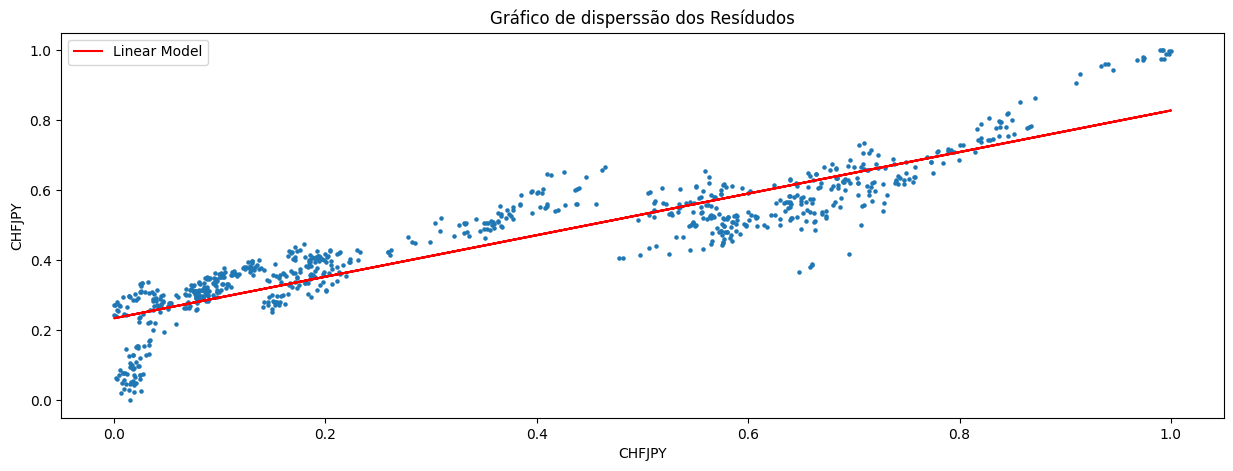

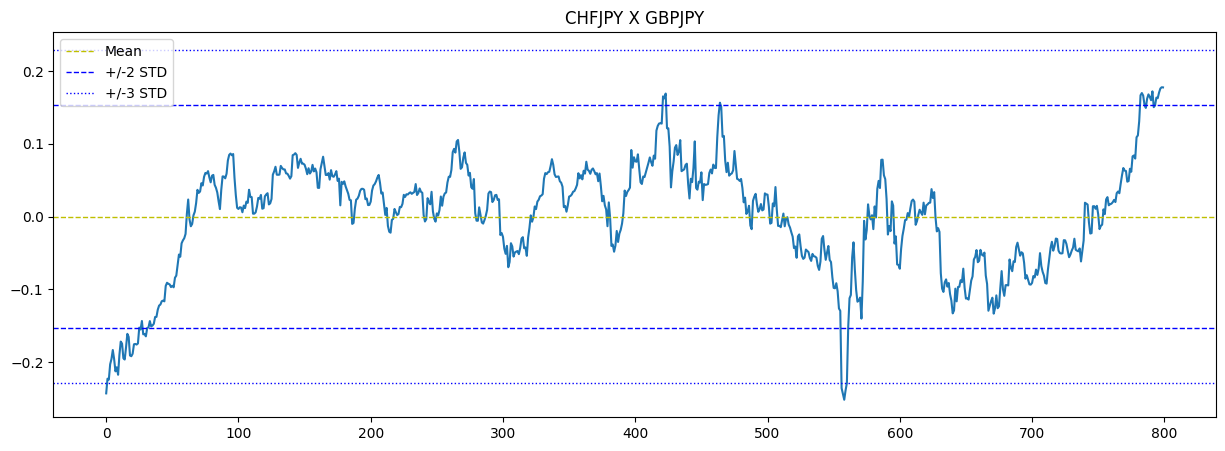

In [51]:
# Definir Tickers
ativoA = df.columns[0]
ativoB = df.columns[1]

# Definir Variável Dependente e Independente
X_independent = df.iloc[:,0].values.reshape(-1, 1)
Y_dependent = df.iloc[:,1].values.reshape(-1, 1)

# Regressão Linear
reg = LinearRegression().fit(X_independent, Y_dependent)

# Gerando coeficiente angular
beta = reg.coef_;

# Gerando coeficiente linear
b = reg.intercept_;

# Gerando Reta da regressao
Y_predict = reg.predict(X_independent);

#Calculando residuos
df['Resíduos'] = (Y_dependent - Y_predict)

#Calculando Z-Score
df['Z-Score'] = (df['Resíduos'] - df['Resíduos'].mean()) / df['Resíduos'].std()

#Aplicando tes Dickey Fulley
test_series = adfuller(df['Resíduos'],autolag='AIC')
print('Beta = %f' % beta)
print('ADF Statistic: %f' % test_series[0])
print('Critical values:')
for key, value in test_series[4].items():
    print('\t%s: %.3f' % (key, value))
confidence = 1 - test_series[1]
resulteste = (f'Confidence: {confidence:.2%}')

#Calculando correlação
correlacao = df.iloc[:,0].corr(df.iloc[:,1])
print('\nCorrelação: %f' % correlacao)
print('Beta: %f' % beta)

#Calculando R-Quadrado
x = sm.add_constant(df.iloc[0:,[0]])
model = sm.OLS(df.iloc[0:,[1]], x).fit()
rsquare = model.rsquared.round(2)

print(f'R-square: {rsquare}')
print(f'\nConfidence: {confidence:.2%}')
print('p-value: %f' % test_series[1],'\n')
    
#Desvio Padrão dos Resíduos
mean = df['Resíduos'].mean()
std = df['Resíduos'].std()
up = mean + std * 2
down = mean - std * 2
up2 = mean + std * 3
down2 = mean - std * 3

if df['Resíduos'].iloc[-1] >= up or df['Resíduos'].iloc[-1] < down:
    print('*'*25)
    print('POSSÍVEL OPORTUNIDADE')
    print('*'*25)
    
elif df['Resíduos'].iloc[-1] >= up2 or df['Resíduos'].iloc[-1] < down2:
    print('*'*25)
    print('GRANDE DISTORÇÃO')
    print('POSSÍVEL OPORTUNIDADE')
    print('*'*25)
    
else:
    print('*'*25)
    print('NENHUMA OPORTUNIDADE')
    print('*'*25)
    
# Plotar Gráficos 

chart = 15,5
#Gerando gráfico da regressão linear
plt.figure(figsize=(chart))
plt.title('Gráfico de disperssão dos Resídudos')
plt.scatter(X_independent, Y_dependent, s=5)
plt.plot(X_independent, Y_predict, color="red", label='Linear Model')
plt.xlabel(ativoA)
plt.ylabel(ativoA)
plt.legend()

#Plotar Gráfico dos Resíduos
plt.figure(figsize=(chart))
plt.title(f'{ativoA} X {ativoB}')
plt.plot(df['Resíduos'])
plt.axhline(y=mean, color='y', linestyle='--', linewidth=1, label='Mean')
plt.axhline(y=up, color='b', linestyle='--', linewidth=1, label=f'+/-{2} STD')
plt.axhline(y=down, color='b', linestyle='--', linewidth=1, label='_nolegend_')
plt.axhline(y=up2, color='b', linestyle=':', linewidth=1, label=f'+/-{3} STD')
plt.axhline(y=down2, color='b', linestyle=':', linewidth=1, label='_nolegend_')
plt.legend(loc='upper left', ncol=1)

plt.show()